In [1]:
import scanpy as sc
from sklearn import metrics

from args import init_args
from train import train
from utils import load_data, setup_seed

In [2]:
args = init_args()
args.seed = 3
setup_seed(args)
adata = load_data(args)
adata

D:\py\anaconda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\py\anaconda\envs\pytorch\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:149: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


AnnData object with n_obs × n_vars = 4221 × 18430
    obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial', 'features'

In [3]:
result_adata = train(args, adata)

Initializing cluster centers with kmeans, n_clusters known


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [08:41<04:47,  1.24it/s]

delta_label  0.0 < tol  0.0001
Reach tolerance threshold. Stopping training.


In [4]:
ARI = metrics.adjusted_rand_score(result_adata.obs['pred'], result_adata.obs['Ground Truth'])
NMI = metrics.normalized_mutual_info_score(result_adata.obs['pred'], result_adata.obs['Ground Truth'])

print('ARI:', ARI)
print('NMI:', NMI)

ARI: 0.6194092195112653
NMI: 0.7426146602217728


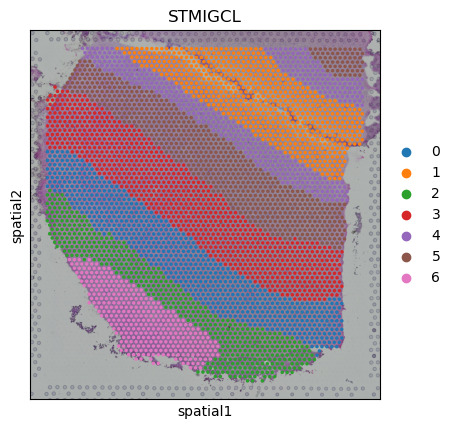

In [5]:
sc.pl.spatial(adata,
            img_key="hires",
            color=["pred"],
            title=["STMIGCL"],
            )